# using simple NN model to classify cifar10 dataset

In [3]:
# load package
import tensorflow.compat.v1 as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train,y_train

170498071/170498071 [==============================] - 197s 1us/step


(array([[[[ 59,  62,  63],
          [ 43,  46,  45],
          [ 50,  48,  43],
          ...,
          [158, 132, 108],
          [152, 125, 102],
          [148, 124, 103]],
 
         [[ 16,  20,  20],
          [  0,   0,   0],
          [ 18,   8,   0],
          ...,
          [123,  88,  55],
          [119,  83,  50],
          [122,  87,  57]],
 
         [[ 25,  24,  21],
          [ 16,   7,   0],
          [ 49,  27,   8],
          ...,
          [118,  84,  50],
          [120,  84,  50],
          [109,  73,  42]],
 
         ...,
 
         [[208, 170,  96],
          [201, 153,  34],
          [198, 161,  26],
          ...,
          [160, 133,  70],
          [ 56,  31,   7],
          [ 53,  34,  20]],
 
         [[180, 139,  96],
          [173, 123,  42],
          [186, 144,  30],
          ...,
          [184, 148,  94],
          [ 97,  62,  34],
          [ 83,  53,  34]],
 
         [[177, 144, 116],
          [168, 129,  94],
          [179, 142,  87],
   

In [33]:
# show some images in this dataset
sampel_10_data = x_train[:10]
sampel_10_label = y_train[:10]
sampel_10_data.shape

(10, 32, 32, 3)

d:\Users\wonyking\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


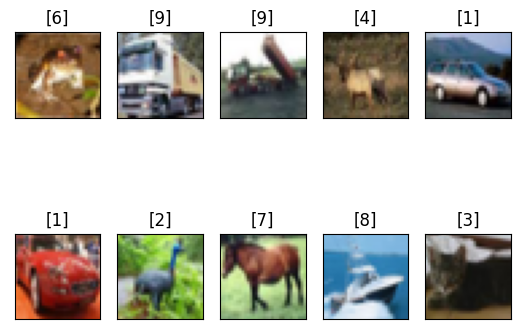

In [14]:
fig, axs = plt.subplots(2,5,sharex=False, sharey=False)
for i in range(2):
    for j in range(5):
        axs[i][j].imshow(sampel_10_data[i * 5 + j],cmap='gray')
        axs[i][j].set(title=sampel_10_label[i * 5 + j])
        # axs[i][j].tick_params(axis='both',which='both')
        
        axs[i][j].set_xticks(())
        axs[i][j].set_yticks(())


(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)


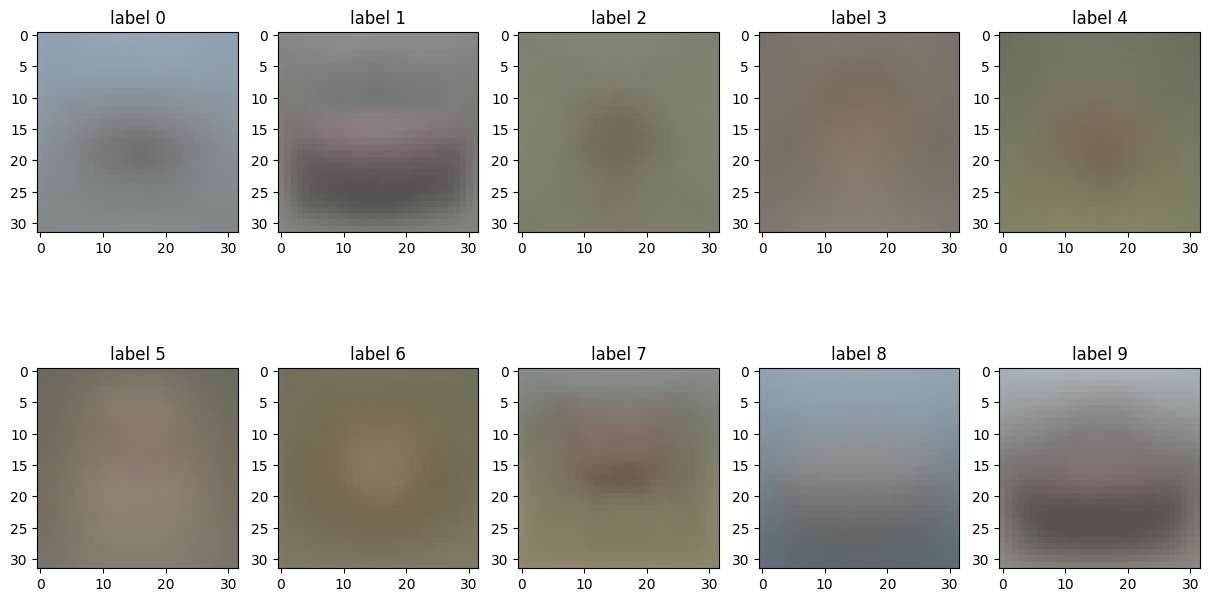

In [34]:
# show average images of every class 

def average_image(label):
    idxs = (y_train[:,0] == label)
    images = x_train[idxs]
    data = np.mean(images.astype(np.float32), axis=0)
    print(x_train.shape, images.shape, data.shape)
    return data / 255

plt.figure(figsize=(15, 8))
for i in range(2):
    for j in range(5):
        plt.subplot(2,5, i * 5 + j + 1)
        plt.imshow(average_image(i * 5 + j))
        plt.title(f"label {i * 5 + j}")


From the above figures, it can be seen that the data for images of the same category are not very similar. The difference between images is relatively small

In [35]:
#### change images from three channels to one channel
print(x_train.shape)
train_x = np.mean(x_train,axis=3) / 255
test_x = np.mean(x_test,axis=3) / 255
train_y = np.eye(10)[y_train]
test_y = np.eye(10)[y_test]
print(train_x.shape)

(50000, 32, 32, 3)
(50000, 32, 32)


Grayscale image of the display image

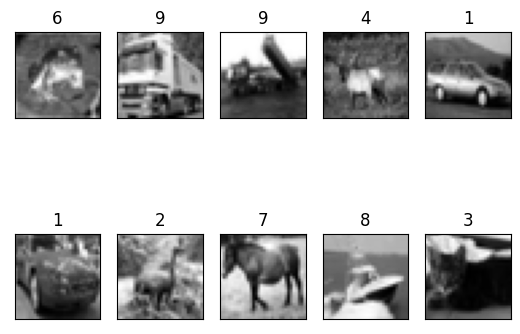

In [22]:
fig, axs = plt.subplots(2,5,sharex=False, sharey=False)
for i in range(2):
    for j in range(5):
        axs[i][j].imshow(train_x[i * 5 + j],cmap='gray')
        axs[i][j].set(title=np.argmax(train_y[i * 5 + j]))        
        axs[i][j].set_xticks(())
        axs[i][j].set_yticks(())

(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)
(50000, 32, 32, 3) (5000, 32, 32, 3) (32, 32, 3)


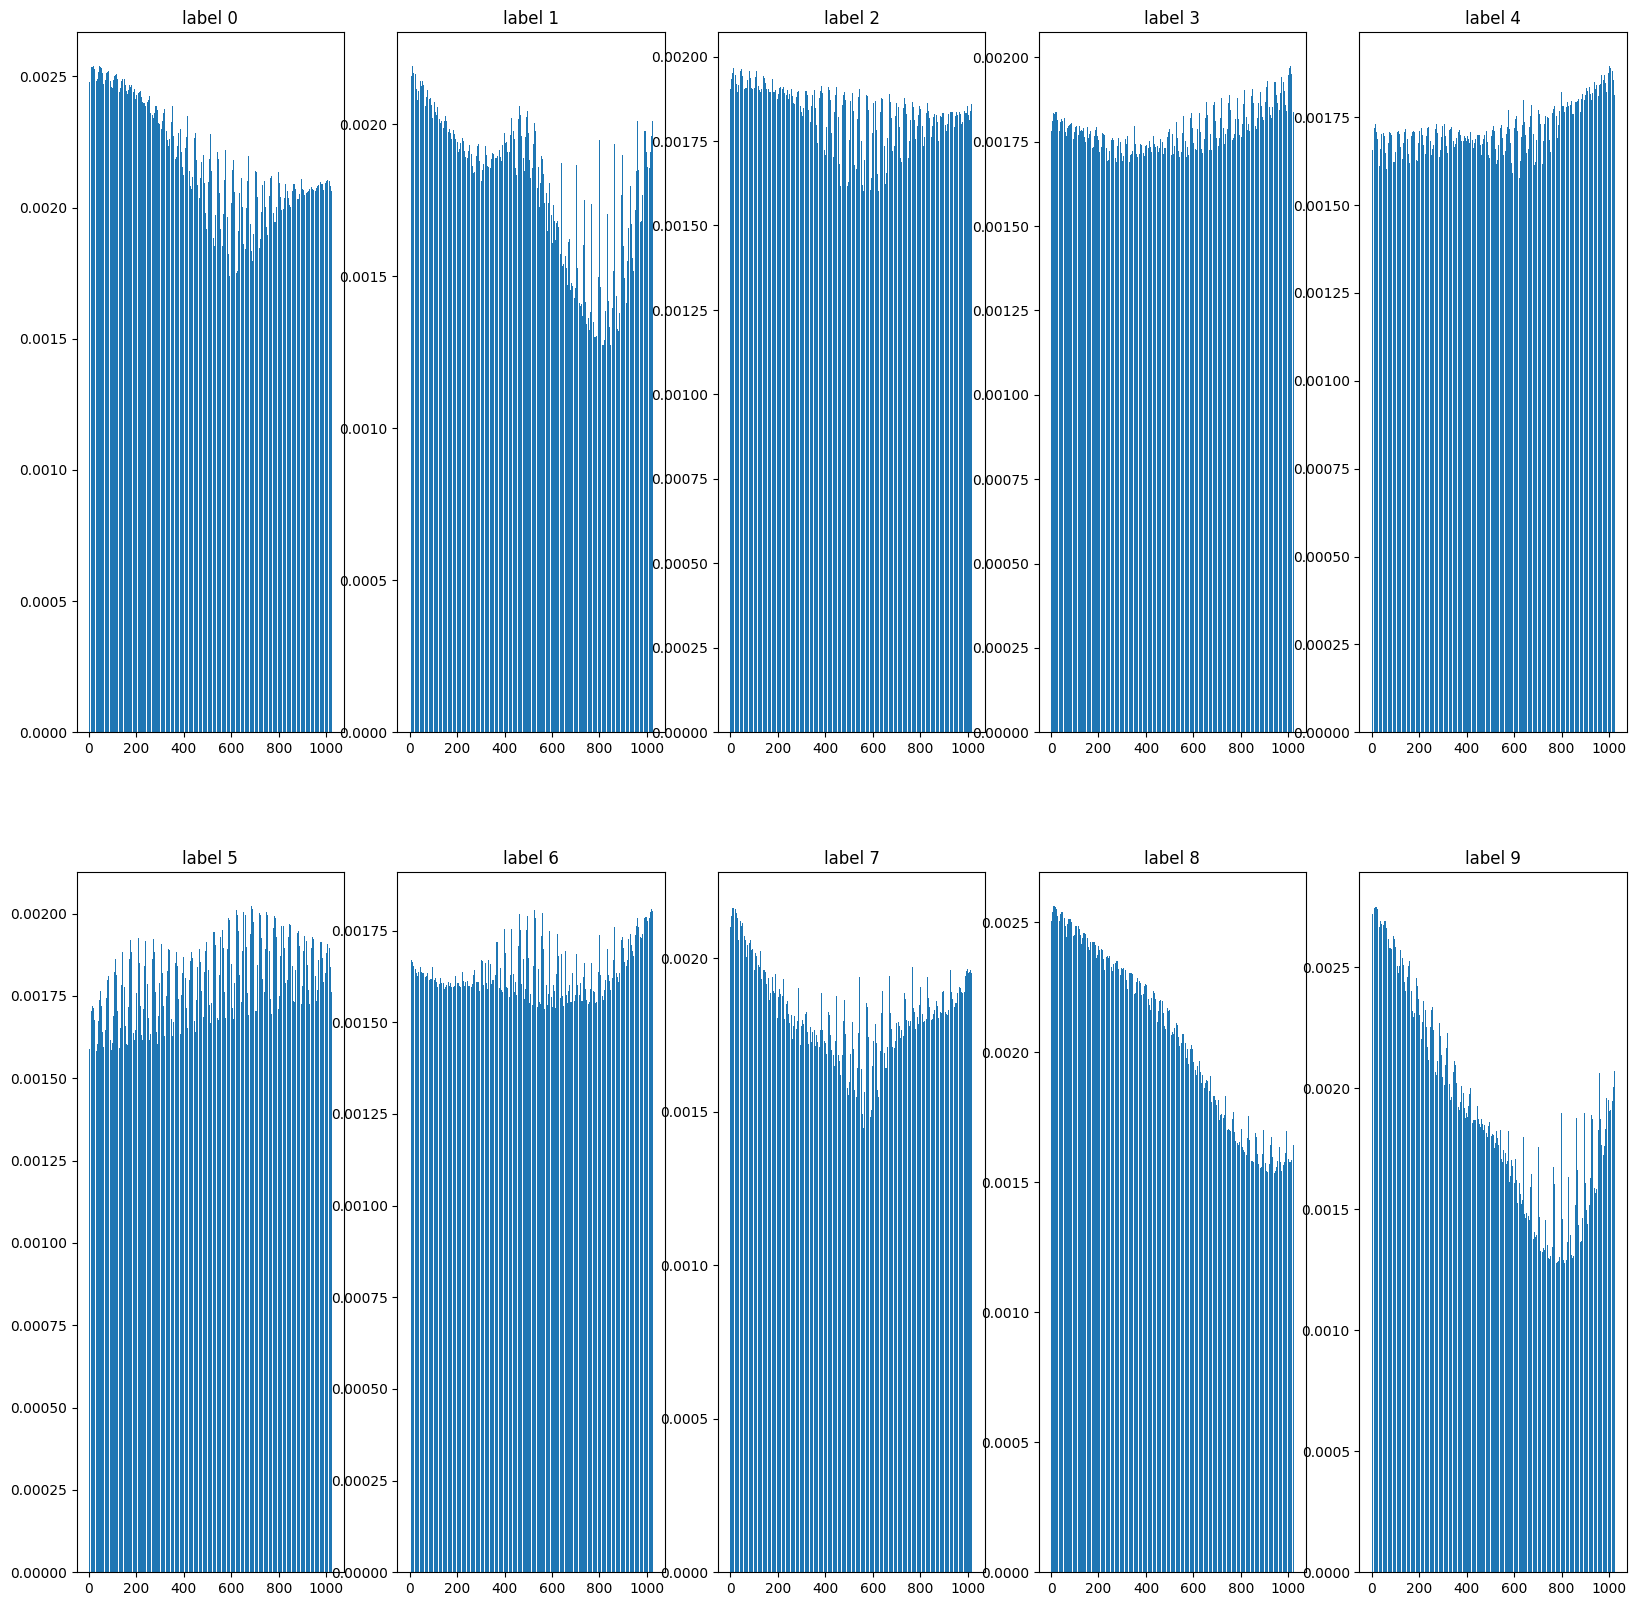

In [36]:
# Data distribution on a grayscale map
avgs = [np.mean(average_image(i), axis = 2) / 255 for i in range(10)]
# Histogram showing the average data distribution for each category
# fig,axs = plt.subplots(2, 5)
plt.figure(figsize=(20, 20))
for i in range(2):
    for j in range(5):
        plt.subplot(2,5, i * 5 + j + 1)
        plt.bar(list(range(32 * 32)), avgs[i * 5 + j].reshape([-1]))
        plt.title(f"label {i * 5 + j}")

It can be seen from the above figure that the distribution of certain types of data is relatively similar, so using a single channel grayscale image for data classification has limited effects

In [37]:
# change images to vector for training NN model
train_x = train_x.reshape([-1,32 * 32])
test_x = test_x.reshape([-1,32 * 32])
train_y,test_y = train_y.reshape([-1, 10]),test_y.reshape([-1, 10])
train_y.shape,test_y.shape

((50000, 10), (10000, 10))

In [38]:
# placeholders for X and y
X = tf.placeholder(tf.float32,[None,32 * 32])
yy = tf.placeholder(tf.float32,[None,10])

In [39]:
# parameters for NN model
W1 = tf.Variable(tf.random_normal([32 * 32,512]))
b1 = tf.Variable(tf.zeros([1,512])+0.2)

W2 = tf.Variable(tf.random_normal([512, 10]))
b2 = tf.Variable(tf.zeros([1,10])+0.2)

We define a neural network using one hidden layer with 512 hidden uints and we use softmax loss function to train our model

In [40]:
prediction = tf.nn.softmax(tf.matmul(tf.nn.sigmoid(tf.matmul(X, W1) + b1), W2) + b2) 

In [41]:
cross_entropy =tf.reduce_mean( -tf.reduce_sum(yy * tf.log(prediction),reduction_indices=[1]))#compute cross_entropy

In [42]:
train = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)


In [43]:
init = tf.global_variables_initializer()


Train Model

In [44]:
print(X.shape, yy.shape)
print(prediction.shape)
sess  = tf.Session()
sess.run(init)


for step in range(100):
    cnt = 0
    batch = 128
    while cnt * batch < train_x.shape[0]:
        # print(step, cnt)
        end = (cnt + 1) * batch
        if end > train_x.shape[0]:
            end = train_x.shape[0]
        batch_x = train_x[cnt * batch : end]
        batch_y = train_y[cnt * batch : end]
        cnt += 1
        sess.run(train, feed_dict={X:batch_x, yy:batch_y})
    print(sess.run(cross_entropy,feed_dict={X:train_x,yy:train_y}))    

correct_prediction = tf.equal(tf.argmax(yy,1), tf.argmax(prediction,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print("test set accuracy: ", sess.run(accuracy, feed_dict={X: test_x, yy: test_y}))

(?, 1024) (?, 10)
(?, 10)
3.8011985
3.0719943
2.7625575
2.5930347
2.4877782
2.420209
2.372445
2.3356528
2.3052971
2.2795472
2.2574186
2.2381663
2.2213326
2.20652
2.1933846
2.1816237
2.1709716
2.1612213
2.152241
2.143951
2.1362796
2.1291554
2.1225111
2.116286
2.1104317
2.1049087
2.0996828
2.0947213
2.0899956
2.085477
2.0811403
2.0769594
2.07291
2.0689676
2.0651097
2.0613163
2.057572
2.0538692
2.0502143
2.0466166
2.0430834
2.0395982
2.0361104
2.0325525
2.0289056
2.0252626
2.021727
2.0183246
2.0150485
2.0118895
2.0088396
2.005894
2.0030448
2.0002873
1.9976147
1.9950235
1.9925127
1.9900835
1.9877361
1.9854662
1.9832677
1.981132
1.9790537
1.9770247
1.9750425
1.9731019
1.9711995
1.9693325
1.9674977
1.9656931
1.9639146
1.9621617
1.9604305
1.9587189
1.957025
1.9553473
1.9536827
1.9520293
1.9503844
1.948744
1.9471047
1.9454628
1.9438171
1.9421687
1.9405211
1.9388802
1.9372499
1.935632
1.9340297
1.9324437
1.9308753
1.9293233
1.9277887
1.926271
1.9247704
1.9232856
1.9218173
1.920365
1.9189284
1.9

From the calculation results of the above model, the classifier obtained by using a hidden layer model combined with data fusion into a single channel has limited effectiveness, which is relatively consistent with our data analysis